Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Use the empty cell to test the exercises. If you modify the original `df`, you can rerun the cell containing `exercise_0`.

In [1]:
Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

SyntaxError: invalid syntax (4003485761.py, line 1)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def exercise_0(file):
    # read the file 
    df = pd.read_csv(file)
    return df

def exercise_1(df):
    # put column names in a list
    df_list = []
    for cols in df.columns:
        df_list.append(cols)
    return df_list
   
def exercise_2(df, k):
    # returning the first k rows
    rows = df.head(k)
    return rows
def exercise_3(df, k):
    # passing a random sample of k data from the df
    sample = df.sample(k)
    return sample

def exercise_4(df):
    # Return a list of the unique transaction types.
    types = df.type.unique()
    return types

def exercise_5(df):
    # Return a Pandas series of the top 10 transaction destinations with frequencies.
    # needs to be a count of the transactions that denotes to frequencies
    des_freq = df['nameDest'].value_counts().head(10)
    return des_freq
def exercise_6(df):
    # Return all the rows from the dataframe for which fraud was detected.
    fraud_rows = []
    for i, rows in df.iterrows():
        if rows['isFraud'] == 1:
            fraud_rows.append(rows)
    return fraud_rows

def exercise_7(df):
    # Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. 
    pass
def visual_1(df):
    def transaction_counts(df):
        # TODO
        return df['type'].value_counts()
            
    def transaction_counts_split_by_fraud(df):
        # TODO
        return df.groupby(by=['type','isFraud']).size()

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Transactions')
    axs[0].set_xlabel('Trasactions types')
    axs[0].set_ylabel('Frequency')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Fraud Detection Occurences')
    axs[1].set_xlabel('Fraud type')
    axs[1].set_ylabel('Frequency')
    fig.suptitle('Visual 1')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    return

def visual_2(df):
    def query(df):
    cash_out = df[df['type']=='CASH_OUT'] # extracting the types that are equal to the given subject
    return cash_out[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] # returning the types within other columns

    plot = query(df).plot.scatter(x='newbalanceOrig',y='newbalanceDest') # creating thhe scatter plot with origin at x and destination at y
    plot.set_title('Origin account balance delta v')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    plt.show()
    return

def exercise_custom(df):
    labels = []
    for i in df['type'].unique():
        labels.append(i)
    return df['type'].value_counts(),labels
    
def visual_custom(df):
    types,label = exercise_custom(df)
    fig,ax = plt.subplots()
    ax.pie(types,labels=label,
           shadow=True, autopct='%1.1f%%')

In [4]:
file = 'transactions.csv'
df = exercise_0(file)

In [5]:
# This is used to test exercise 1 function 
columns = exercise_1(df)
print(columns)

# this is testing exercise 2 function
k = int(input("Enter a number of rows to view: "))
rows = exercise_2(df,k)
print(rows)
print() 

# This is testing exercise 3 function 
k = int(input("Enter a number of rows to view a sample of the data: "))
sample = exercise_3(df,k)
print(sample)
print()

# This is testing exercise 4 function
types = exercise_4(df)
print(types)

# This is testing exercise 5 function
series = exercise_5(df)
print(series)

# Testing out exercise 6 function 
fraud = exercise_6(df)
print(fraud)

# Testing out exercise 7 function

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
   step     type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1  PAYMENT  9839.64  C1231006815       170136.0       160296.36   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  

        step     type   amount    nameOrig  oldbalanceOrg  newbalanceOrig  \
195204    13  PAYMENT  9294.85  C229375738            0.0             0.0   

          nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
195204  M125198170             0.0             0.0        0               0  

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
nameDest
C985934102     84
C1286084959    80
C248609774     75
C1590550415    74
C2083562754    74
C665576141     72
C977993101     70
C1360767589    69
C451111351     66
C97730845      64


Create graphs for the following. 
1. Transaction types bar chart, Transaction types split by fraud bar chart
1. Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions

Ensure that the graphs have the following:
 - Title
 - Labeled Axes
 
The function plot the graph and then return a string containing a short description explaining the relevance of the chart.

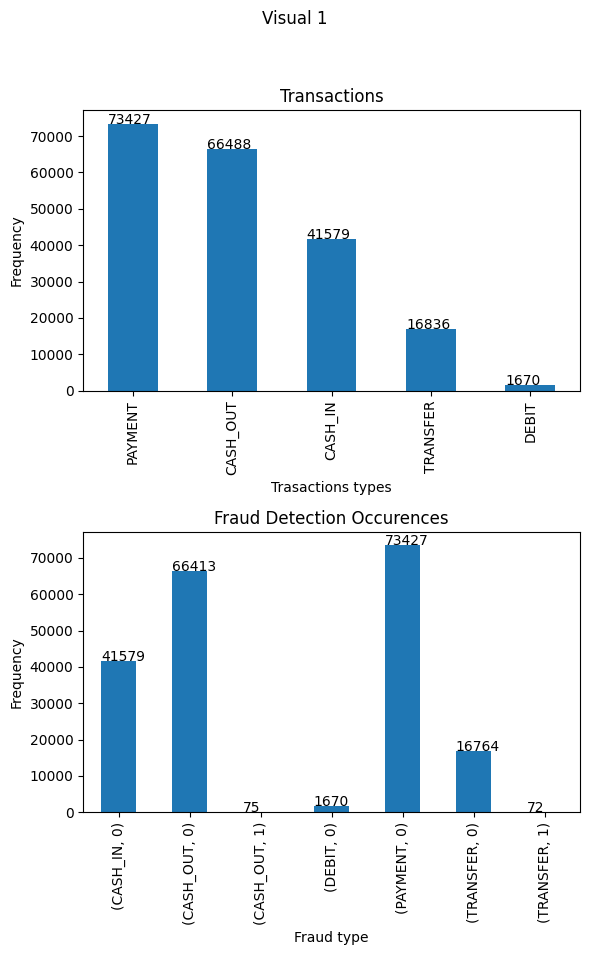

In [6]:
def visual_1(df):
    def transaction_counts(df):
        # TODO
        return df['type'].value_counts()
            
    def transaction_counts_split_by_fraud(df):
        # TODO
        return df.groupby(by=['type','isFraud']).size()

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Transactions')
    axs[0].set_xlabel('Trasactions types')
    axs[0].set_ylabel('Frequency')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Fraud Detection Occurences')
    axs[1].set_xlabel('Fraud type')
    axs[1].set_ylabel('Frequency')
    fig.suptitle('Visual 1')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    return

visual_1(df)


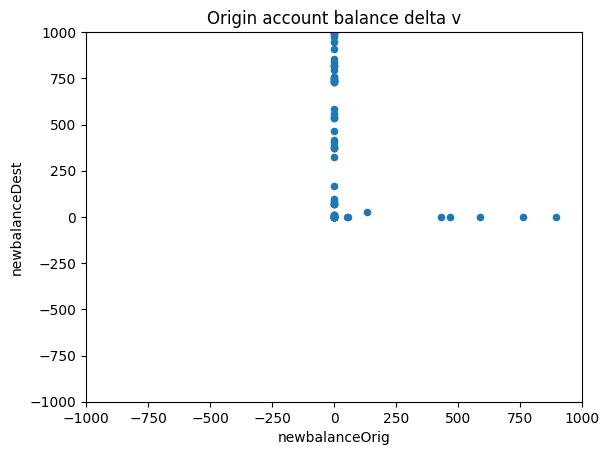

In [7]:
def visual_2(df):
    #     # Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transaction
    def query(df):
        cash_out = df[df['type']=='CASH_OUT'] # extracting the types that are equal to the given subject
        return cash_out[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] # returning the types within other columns

    plot = query(df).plot.scatter(x='newbalanceOrig',y='newbalanceDest') # creating thhe scatter plot with origin at x and destination at y
    plot.set_title('Origin account balance delta v')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    plt.show()
    return

visual_2(df)


Use your newly-gained Pandas skills to find an insight from the dataset. You have full flexibility to go in whichever direction interests you. Please create a visual as above for this query. `visual_custom` should call `exercise_custom`.

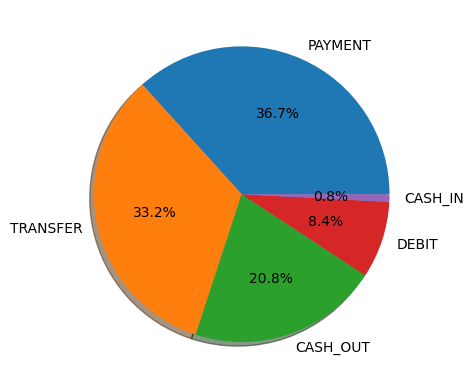

In [8]:
def exercise_custom(df):
    labels = []
    for i in df['type'].unique():
        labels.append(i)
    return df['type'].value_counts(),labels
    
def visual_custom(df):
    types,label = exercise_custom(df)
    fig,ax = plt.subplots()
    ax.pie(types,labels=label,
           shadow=True, autopct='%1.1f%%')

visual_custom(df)

Submission

1. Copy the exercises into `task1.py`.
2. Upload `task1.py` to Forage.

All done!

Your work will be instrumental for our team's continued success.